![Movie popcorn on red background](redpopcorn.jpg)

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions:

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [40]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Start coding!
df = pd.read_csv('netflix_data.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [41]:
# See "type" column 
df['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

In [42]:
# Filter to remove TV shows and store as netflix_subset
netflix_subset = df[df['type'] != 'TV Show']
netflix_subset['type'].value_counts()

Movie    5377
Name: type, dtype: int64

In [43]:
# Keep only relevant columns. Save it to netflix_movies

netflix_movies = netflix_subset[["title", "country", "genre", "release_year", "duration"]]
netflix_movies.head()

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


In [44]:
# Filter netflix_movies to find movies that are shorter than 60 minutes. Save as short_movies

short_movies = netflix_movies[netflix_movies['duration'] < 60]
short_movies.head()

,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28


In [45]:
# Checking genre categories

short_movies['genre'].value_counts()

Documentaries           151
Children                107
Stand-Up                 72
Uncategorized            40
Comedies                 15
Dramas                   12
Classic Movies            8
Action                    6
International Movies      3
Anime Features            3
Music                     2
Horror Movies             1
Name: genre, dtype: int64

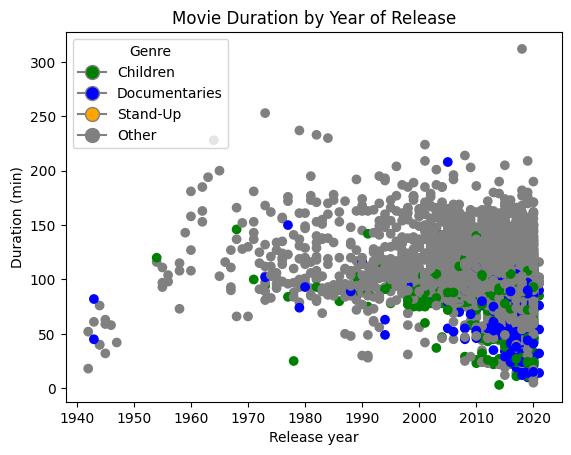

In [46]:
# Using a for loop and if/elif statements, assign colors.

colors = []
for index, row in netflix_movies.iterrows():
    if 'Children' in row['genre']:
        colors.append('green')
    elif 'Documentaries' in row['genre']:
        colors.append('blue')
    elif 'Documentaries' in row['genre']:
        colors.append('orange')
    else:
        colors.append('gray')

# Create a scatter plot
fig, ax = plt.subplots()
scatter = ax.scatter(netflix_movies['release_year'], netflix_movies['duration'], c=colors,)

# Plot labels
ax.set_xlabel('Release year')
ax.set_ylabel('Duration (min)')
ax.set_title('Movie Duration by Year of Release')

# Create a legend
legend_labels = ['Children', 'Documentaries', 'Stand-Up', 'Other']
legend_elements = [plt.Line2D([0], [0], marker='o', color='gray', markerfacecolor=color, markersize=10) for color in ['green', 'blue', 'orange', 'gray']]
ax.legend(legend_elements, legend_labels, title='Genre')

# Show the plot
plt.show()


In [47]:
# Are we certain that movies are getting shorter?

answer = "maybe"
print("Are we certain that movies are getting shorter?")
print("Answer:", answer)

Are we certain that movies are getting shorter?
Answer: maybe
